https://colab.research.google.com/drive/1_6F5znLWMh9LDvrHdItjcAcf-QAYgqQ2?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from google.colab import drive
from sklearn import metrics

In [ ]:
drive.mount('/content/drive')
# dataset = pd.read_csv('/content/drive/MyDrive/4-course/cdc-dataset/diabetes_012_health_indicators_BRFSS2015.csv')
dataset = pd.read_csv('/content/drive/MyDrive/4-course/cdc-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset.rename(columns={'Diabetes_binary':'Diabetes_012'}, inplace=True)

In [ ]:
diabetes_binary_5050split = pd.read_csv('/content/drive/MyDrive/4-course/cdc-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
diabetes_binary = pd.read_csv('/content/drive/MyDrive/4-course/cdc-dataset/diabetes_binary_health_indicators_BRFSS2015.csv')

In [ ]:
diabetes_binary_5050split['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0.0,35346
1.0,35346


In [ ]:
diabetes_binary['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0.0,218334
1.0,35346


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
dataset.shape

(70692, 22)

In [ ]:
dataset.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
dataset['Diabetes_012'].unique()

array([0., 1.])

In [ ]:
dataset['Diabetes_012'].value_counts()

,count
Diabetes_012,
0.0,35346
1.0,35346


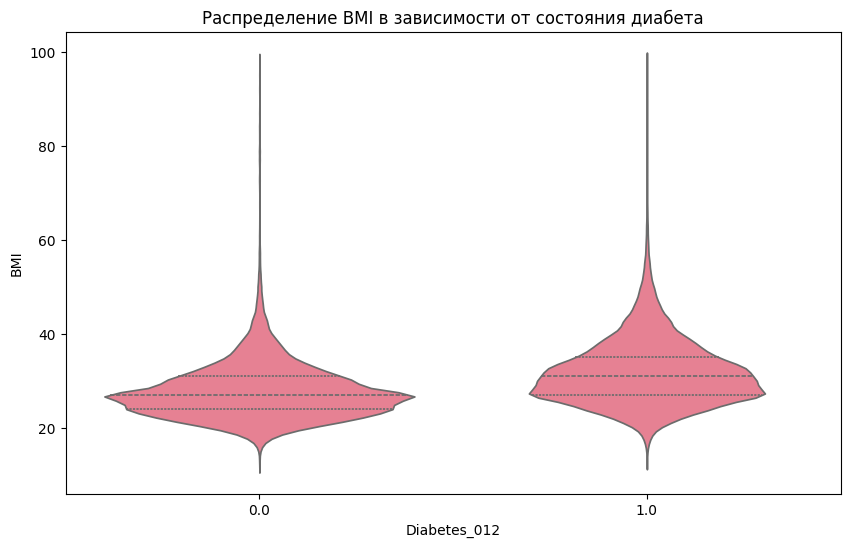

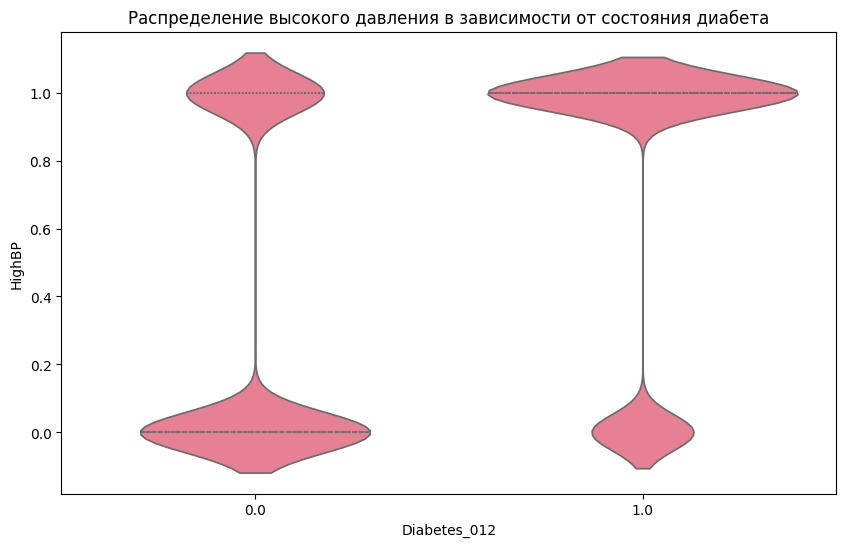

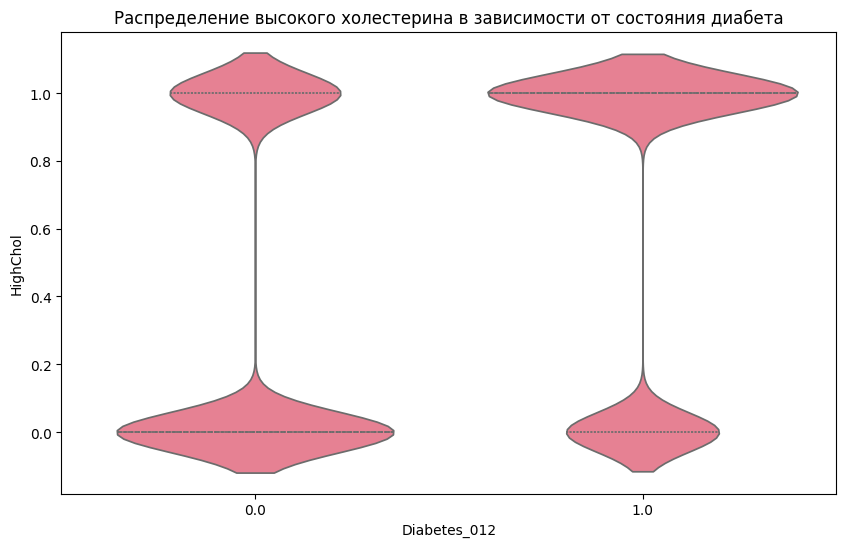

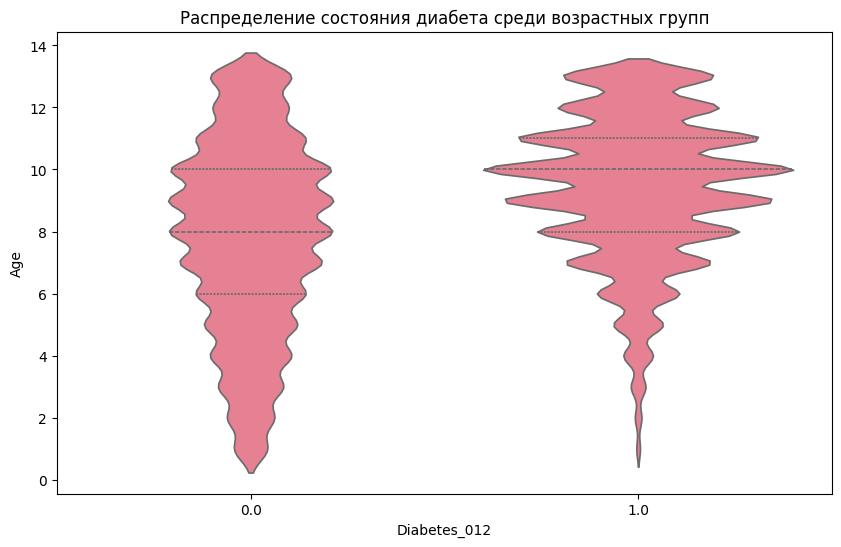

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diabetes_012', y='BMI', data=dataset, inner='quartile')
plt.title('Распределение BMI в зависимости от состояния диабета')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Diabetes_012', y='HighBP', data=dataset, inner='quartile')
plt.title('Распределение высокого давления в зависимости от состояния диабета')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Diabetes_012', y='HighChol', data=dataset, inner='quartile')
plt.title('Распределение высокого холестерина в зависимости от состояния диабета')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Diabetes_012', y='Age', data=dataset, inner='quartile')
plt.title('Распределение состояния диабета среди возрастных групп')
plt.show()

In [ ]:
df_0 = dataset[dataset['Diabetes_012'] == 0].sample(n=2000, random_state=42)
df_1 = dataset[dataset['Diabetes_012'] == 1].sample(n=2000, random_state=42)
# df_2 = dataset[dataset['Diabetes_012'] == 2].sample(n=4631, random_state=42)

df_balanced = pd.concat([df_0, df_1])

selected_features = ['BMI', 'HighBP', 'HighChol', 'Age', 'PhysActivity', 'Smoker', 'GenHlth', 'MentHlth']


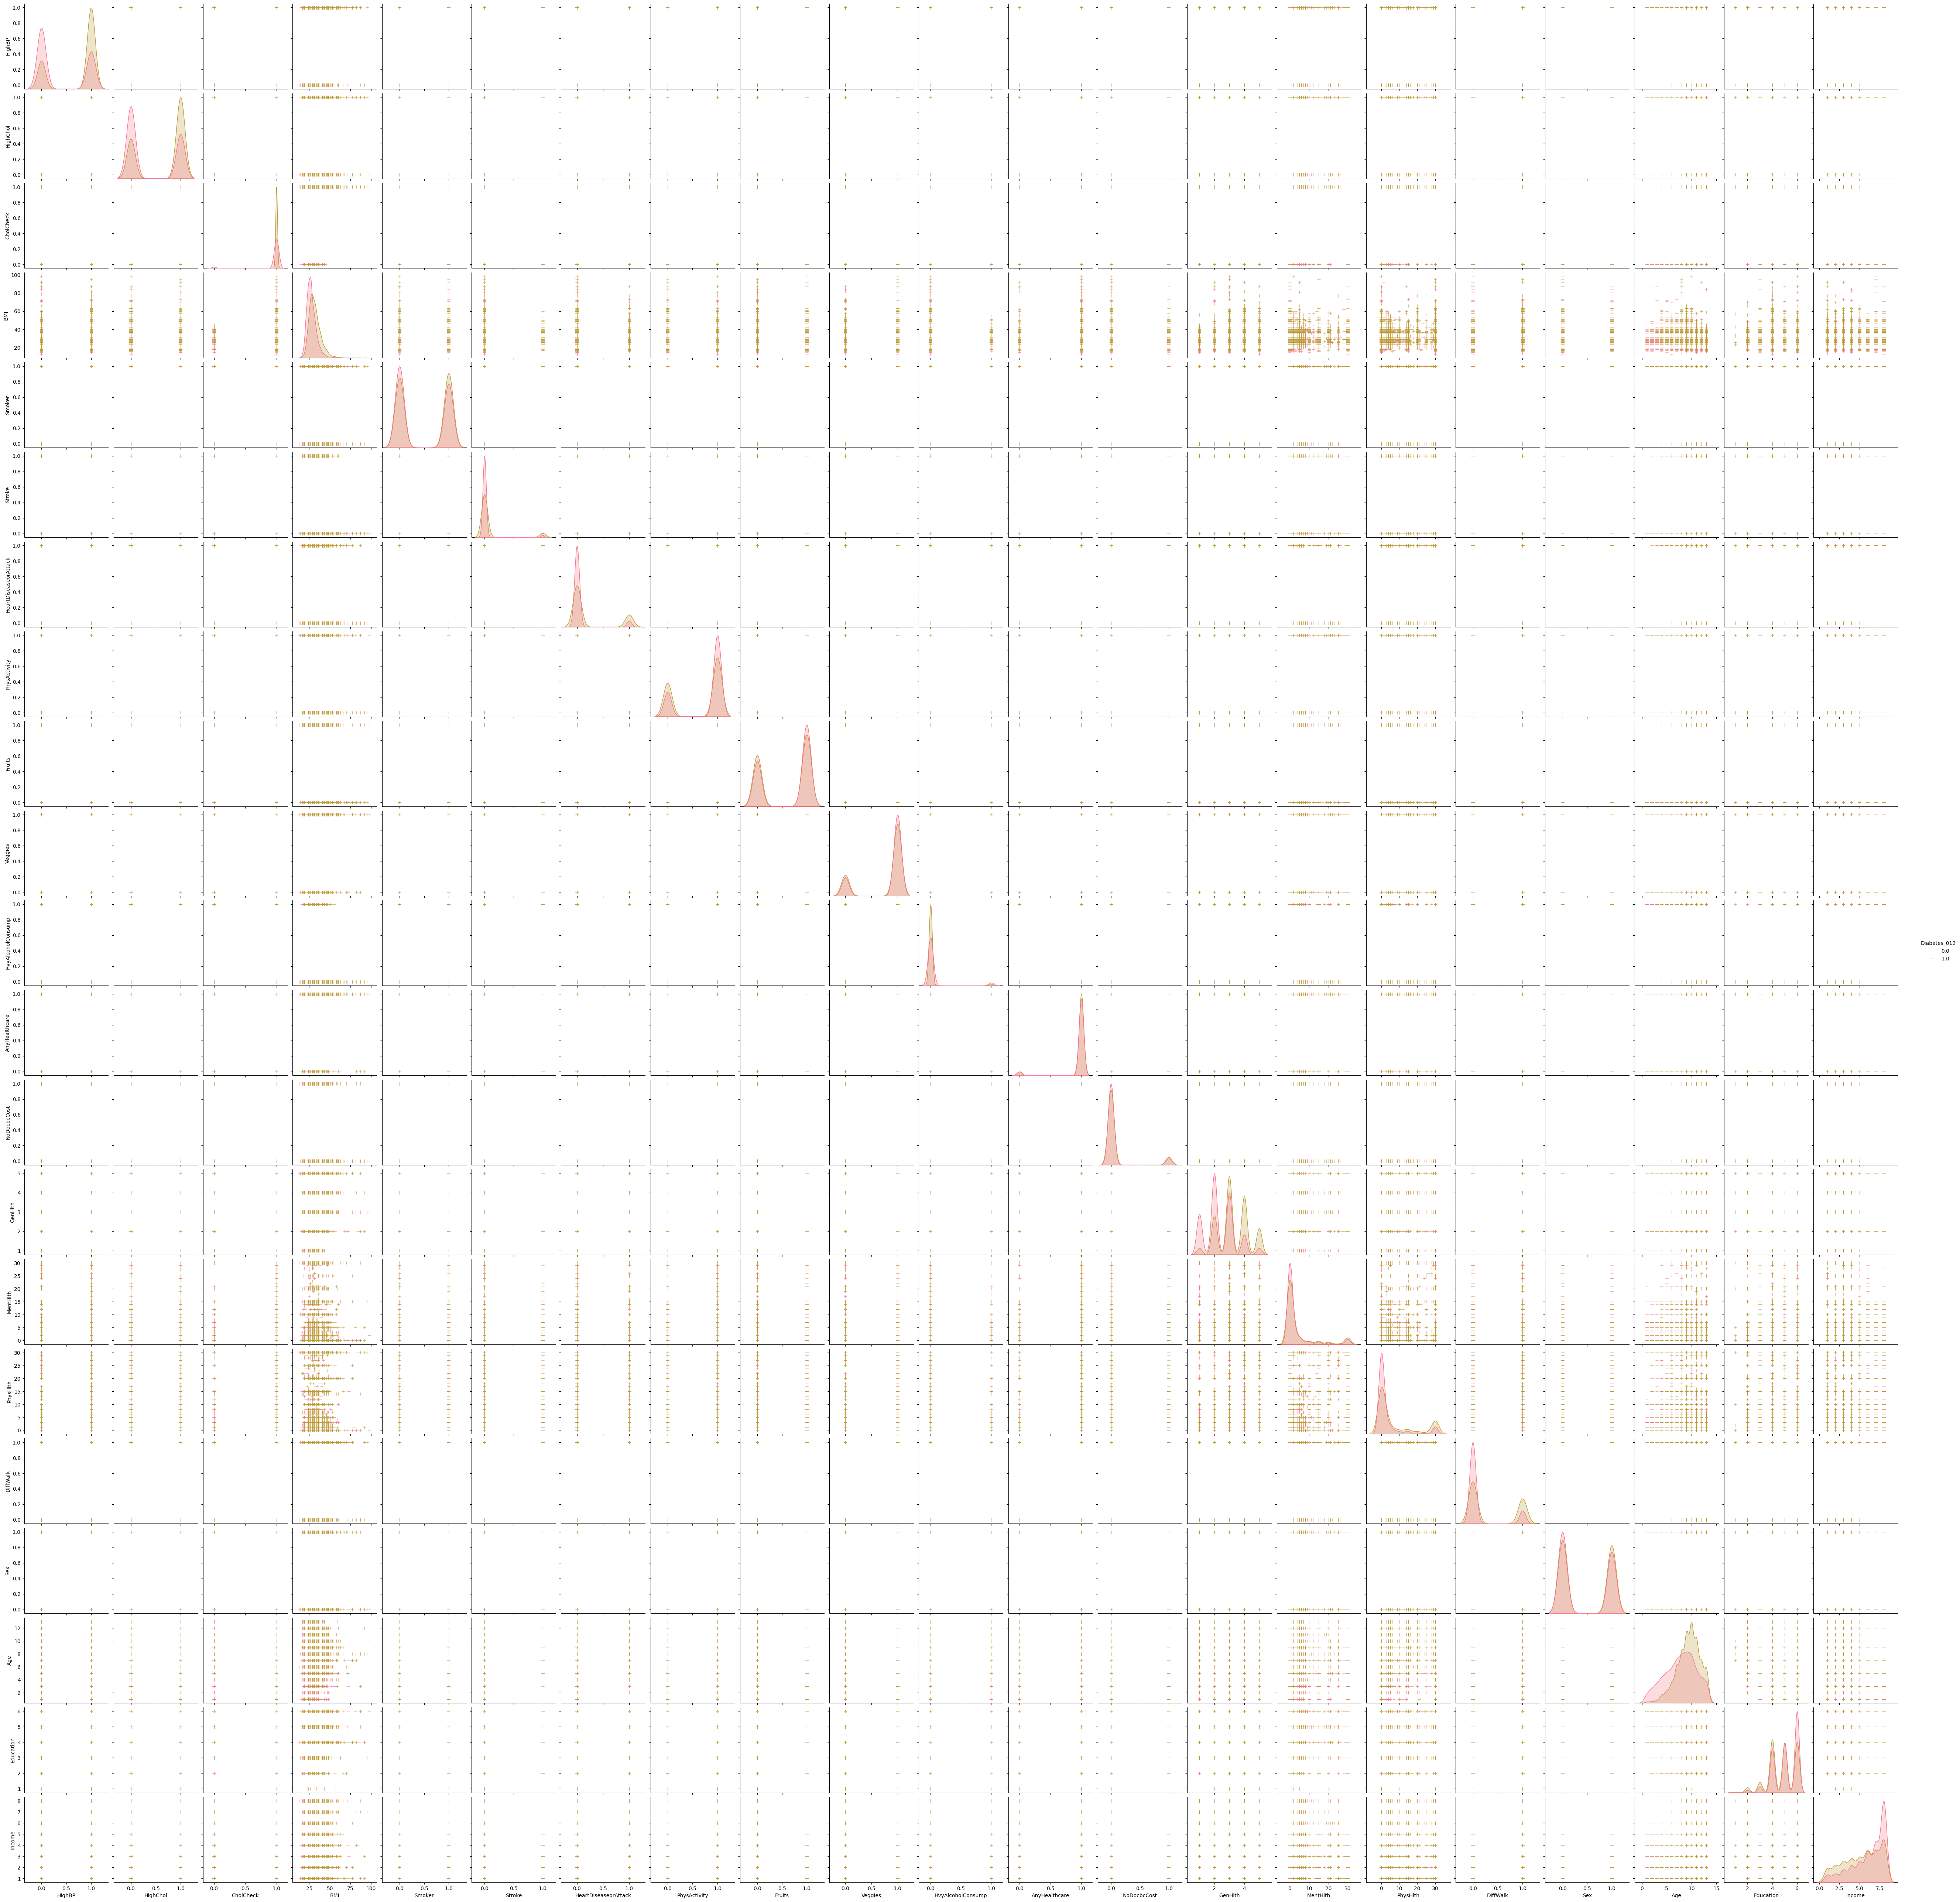

In [ ]:
sns.pairplot(df_balanced, hue='Diabetes_012', markers='+')
plt.show()

# BMI: Индекс массы тела — важный показатель для диабета.
# HighBP: Высокое давление — часто связано с диабетом.
# HighChol: Холестерин — может быть связан с диабетом и сердечно-сосудистыми рисками.
# Age: Возраст — диабет чаще встречается у пожилых людей.
# PhysActivity: Физическая активность — фактор, влияющий на здоровье.
# Smoker: Курение — может быть связано с рисками для здоровья.
# GenHlth: Общее состояние здоровья — самооценка здоровья человека.
# MentHlth: Психическое здоровье — интересный фактор для анализа с точки зрения стресса и эмоционального состояния.

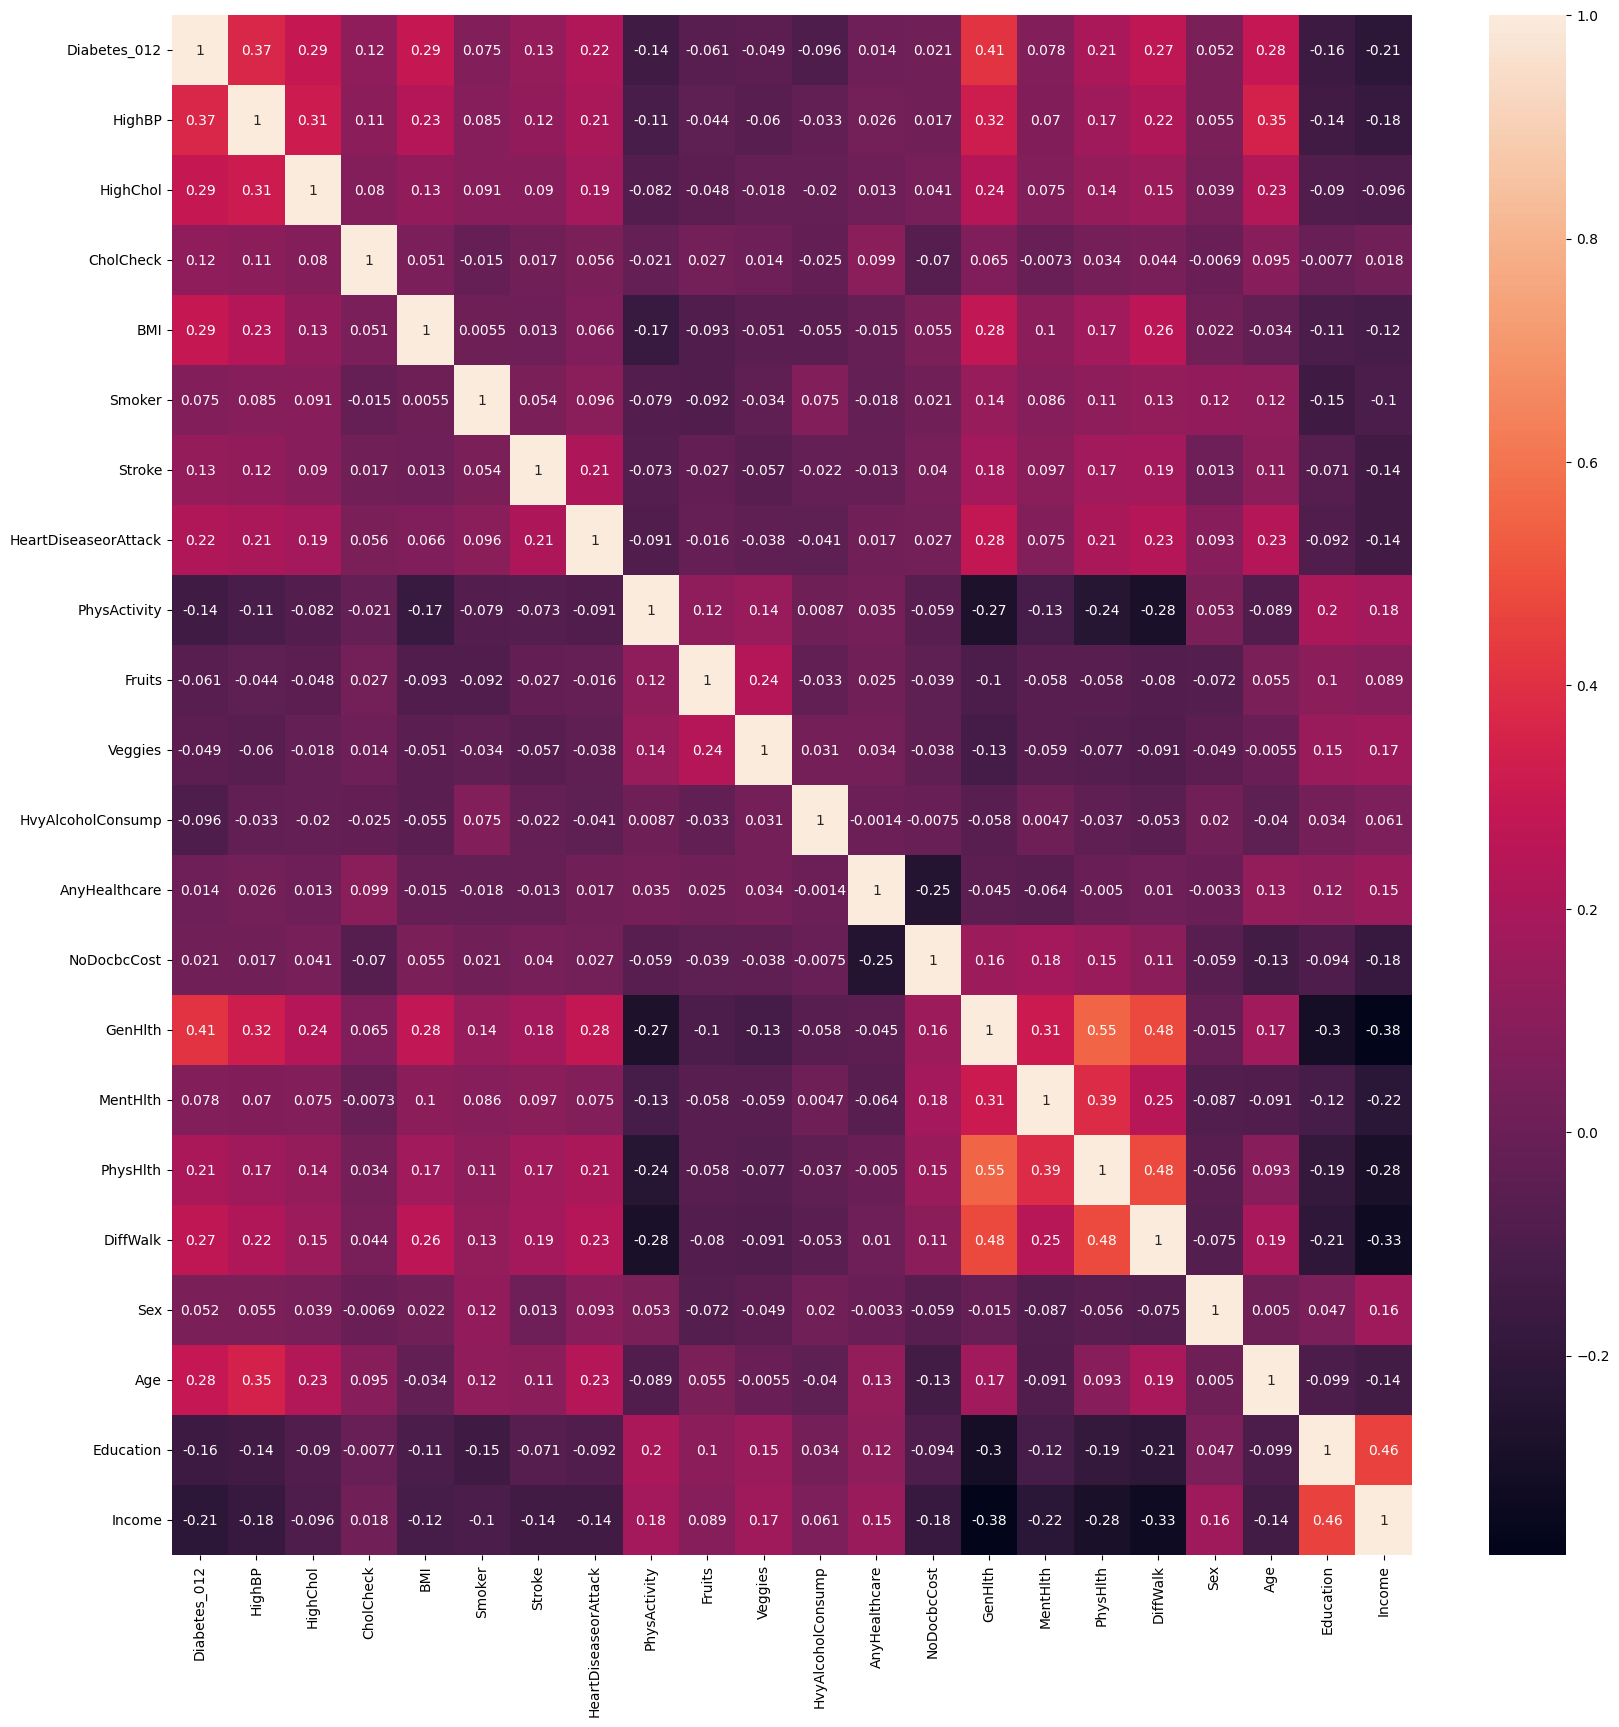

In [ ]:
plt.figure(figsize=(20,20))
# select = selected_features
# select.insert(0, 'Diabetes_012')
# df_bal2 = df_balanced[select]
sns.heatmap(df_balanced.corr(numeric_only = True), annot=True)
plt.show()

In [ ]:
X = df_balanced.drop(['Diabetes_012'], axis=1)
y = df_balanced['Diabetes_012']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (9262, 21) | y shape: (9262,) 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

Logistic Regression (LR)

Linear Discriminant Analysis (LDA)

K-Nearest Neighbors (KNN)

Classification and Regression Trees (CART)

Gaussian Naive Bayes (NB)

Support Vector Machines (SVM)

---



In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.744770 (0.017463)
LDA: 0.743825 (0.014785)
KNN: 0.688084 (0.015666)
CART: 0.643678 (0.019375)
NB: 0.719937 (0.017379)
SVC: 0.722502 (0.016445)


In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)

print(f'LR accuracy: {acc}')

LR accuracy: 0.7436589314624933


In [ ]:
recall = metrics.recall_score(y_test, pred, average="weighted")
precision = metrics.precision_score(y_test, pred, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Детали:")

print(metrics.classification_report(y_test, pred, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.74
Precision (confidence when predicting a 1): 0.74
Детали:
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       947
         1.0       0.73      0.76      0.74       906

    accuracy                           0.74      1853
   macro avg       0.74      0.74      0.74      1853
weighted avg       0.74      0.74      0.74      1853

